In [2]:
#Priya Notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st

desert = "./Priya's Resources/Food Deserts/food_access_research_atlas.csv"
variable = "./Priya's Resources/Food Deserts/food_access_variable_lookup.csv"
farmers_market = "./Priya's Resources/Farmers Markets/farmers_markets_from_usda.csv"
county_info = "./Priya's Resources/Farmers Markets/wiki_county_info.csv" 


desert_df = pd.read_csv(desert)
desert_var = pd.read_csv(variable)
farmers_df = pd.read_csv(farmers_market)
county_df = pd.read_csv(county_info)

# Farmers Market Data Overview / Cleaning

In [3]:
farmers_df.head()

,FMID,MarketName,Website,Facebook,Twitter,Youtube,OtherMedia,street,city,County,...,Coffee,Beans,Fruits,Grains,Juices,Mushrooms,PetFood,Tofu,WildHarvested,updateTime
0,1018261,Caledonia Farmers Market Association - Danville,https://sites.google.com/site/caledoniafarmers...,https://www.facebook.com/Danville.VT.Farmers.M...,NaN,NaN,NaN,NaN,Danville,Caledonia,...,Y,Y,Y,N,N,Y,Y,N,N,6/20/2017 22:43
1,1018318,Stearns Homestead Farmers' Market,http://www.StearnsHomestead.com,StearnsHomesteadFarmersMarket,NaN,NaN,NaN,6975 Ridge Road,Parma,Cuyahoga,...,N,N,Y,N,N,N,N,N,N,6/21/2017 17:15
2,1009364,106 S. Main Street Farmers Market,http://thetownofsixmile.wordpress.com/,NaN,NaN,NaN,NaN,106 S. Main Street,Six Mile,Pickens,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013
3,1010691,10th Steet Community Farmers Market,NaN,NaN,NaN,NaN,http://agrimissouri.com/mo-grown/grodetail.php...,10th Street and Poplar,Lamar,Barton,...,N,N,Y,N,N,N,N,N,N,10/28/2014 9:49
4,1002454,112st Madison Avenue,NaN,NaN,NaN,NaN,NaN,112th Madison Avenue,New York,New York,...,N,N,N,N,N,N,N,N,N,3/1/2012 10:38


In [4]:
farmers_df.columns

Index(['FMID', 'MarketName', 'Website', 'Facebook', 'Twitter', 'Youtube',
       'OtherMedia', 'street', 'city', 'County', 'State', 'zip', 'Season1Date',
       'Season1Time', 'Season2Date', 'Season2Time', 'Season3Date',
       'Season3Time', 'Season4Date', 'Season4Time', 'x', 'y', 'Location',
       'Credit', 'WIC', 'WICcash', 'SFMNP', 'SNAP', 'Organic', 'Bakedgoods',
       'Cheese', 'Crafts', 'Flowers', 'Eggs', 'Seafood', 'Herbs', 'Vegetables',
       'Honey', 'Jams', 'Maple', 'Meat', 'Nursery', 'Nuts', 'Plants',
       'Poultry', 'Prepared', 'Soap', 'Trees', 'Wine', 'Coffee', 'Beans',
       'Fruits', 'Grains', 'Juices', 'Mushrooms', 'PetFood', 'Tofu',
       'WildHarvested', 'updateTime'],
      dtype='object')

In [5]:
county_df = county_df.rename(columns={"county":"County"})
county_df.head()

,number,County,State,per capita income,median household income,median family income,population,number of households
0,1,New York County,New York,"$62,498","$69,659","$84,627","1,605,272","736,192"
1,2,Arlington,Virginia,"$62,018","$103,208","$139,244","214,861","94,454"
2,3,Falls Church City,Virginia,"$59,088","$120,000","$152,857","12,731","5,020"
3,4,Marin,California,"$56,791","$90,839","$117,357","254,643","102,912"
4,5,Alexandria City,Virginia,"$54,608","$85,706","$107,511","143,684","65,369"


In [6]:
farmers_df.columns

Index(['FMID', 'MarketName', 'Website', 'Facebook', 'Twitter', 'Youtube',
       'OtherMedia', 'street', 'city', 'County', 'State', 'zip', 'Season1Date',
       'Season1Time', 'Season2Date', 'Season2Time', 'Season3Date',
       'Season3Time', 'Season4Date', 'Season4Time', 'x', 'y', 'Location',
       'Credit', 'WIC', 'WICcash', 'SFMNP', 'SNAP', 'Organic', 'Bakedgoods',
       'Cheese', 'Crafts', 'Flowers', 'Eggs', 'Seafood', 'Herbs', 'Vegetables',
       'Honey', 'Jams', 'Maple', 'Meat', 'Nursery', 'Nuts', 'Plants',
       'Poultry', 'Prepared', 'Soap', 'Trees', 'Wine', 'Coffee', 'Beans',
       'Fruits', 'Grains', 'Juices', 'Mushrooms', 'PetFood', 'Tofu',
       'WildHarvested', 'updateTime'],
      dtype='object')

In [7]:
farmers_access_df = farmers_df.loc[:,['MarketName','city', 'County', 'State',
                                      'WIC', 'WICcash', 'SFMNP','SNAP']]
farmers_access_df.head()

,MarketName,city,County,State,WIC,WICcash,SFMNP,SNAP
0,Caledonia Farmers Market Association - Danville,Danville,Caledonia,Vermont,Y,N,Y,N
1,Stearns Homestead Farmers' Market,Parma,Cuyahoga,Ohio,N,N,Y,N
2,106 S. Main Street Farmers Market,Six Mile,Pickens,South Carolina,N,N,N,N
3,10th Steet Community Farmers Market,Lamar,Barton,Missouri,N,N,N,N
4,112st Madison Avenue,New York,New York,New York,N,Y,Y,N


In [46]:
access_df = pd.merge(farmers_access_df,county_df, how = "outer",on = "County")
access_df = access_df[access_df.MarketName.notnull()]
cleaned_access = access_df.drop_duplicates("MarketName").reset_index()
cleaned_access = cleaned_access[["MarketName","city","County","State_x","WIC","WICcash","SFMNP","SNAP","per capita income","median household income","median family income","population","number of households"]]
cleaned_access = cleaned_access.rename(columns={
    "city":"City",
    "State_x":"State",
    "per capita income": "Income Per Capita",
    "median household income": "Median Household Income",
    "median family income": "Median Family Income",
    "population":"Population",
    "number of households":"Number of Households"
})
cleaned_access = cleaned_access[cleaned_access.Population.notnull()]
cleaned_access = cleaned_access[cleaned_access["Income Per Capita"].notnull()]
cleaned_access["Income Per Capita"]= cleaned_access["Income Per Capita"].str.replace(',', '').str.replace('$','').astype(int)
cleaned_access["Median Household Income"]= cleaned_access["Median Household Income"].str.replace(',', '').str.replace('$','').astype(int)
cleaned_access["Median Family Income"]= cleaned_access["Median Family Income"].str.replace(',', '').str.replace('$','').astype(int)
cleaned_access["Population"]= cleaned_access["Population"].str.replace(',', '').astype(int)
cleaned_access["Number of Households"]= cleaned_access["Number of Households"].str.replace(',', '').astype(int)
cleaned_access.head()

,MarketName,City,County,State,WIC,WICcash,SFMNP,SNAP,Income Per Capita,Median Household Income,Median Family Income,Population,Number of Households
0,Caledonia Farmers Market Association - Danville,Danville,Caledonia,Vermont,Y,N,Y,N,23584,45395,54941,31157,12491
1,Caledonia Farmers Market Association - Saturday,St. Johnsbury,Caledonia,Vermont,Y,N,Y,Y,23584,45395,54941,31157,12491
2,Caledonia Farmers Market Association - Winter,St. Johnsbury,Caledonia,Vermont,N,N,N,N,23584,45395,54941,31157,12491
3,Groton Growers Farmers' Market,Groton,Caledonia,Vermont,Y,N,Y,Y,23584,45395,54941,31157,12491
4,Hardwick Farmers' Market,Hardwick,Caledonia,Vermont,Y,Y,Y,Y,23584,45395,54941,31157,12491


In [47]:
cleaned_access_income = round(cleaned_access.groupby("State").mean(),2)
cleaned_access_income = cleaned_access_income[["Median Household Income","Income Per Capita"]].reset_index()
cleaned_access_income.head()

,State,Median Household Income,Income Per Capita
0,Alabama,54869.86,28138.94
1,Alaska,71762.55,33145.07
2,Arizona,49382.46,25615.11
3,Arkansas,49388.85,25940.38
4,California,61978.26,30828.51


In [48]:
cleaned_states = cleaned_access.groupby("State").count().reset_index()
cleaned_states = cleaned_states[["State","MarketName"]]
cleaned_states.head()

,State,MarketName
0,Alabama,125
1,Alaska,29
2,Arizona,87
3,Arkansas,87
4,California,717


## No Food Assistance Programs

In [49]:
support_none_df = cleaned_access.loc[(cleaned_access["WIC"] == "N") & 
                   (cleaned_access ["WICcash"] == "N") &
                   (cleaned_access ["SFMNP"] == "N") &
                   (cleaned_access ["SNAP"] == "N"),:]
support_none_df.head()

,MarketName,City,County,State,WIC,WICcash,SFMNP,SNAP,Income Per Capita,Median Household Income,Median Family Income,Population,Number of Households
2,Caledonia Farmers Market Association - Winter,St. Johnsbury,Caledonia,Vermont,N,N,N,N,23584,45395,54941,31157,12491
6,Lyndonville Farmers' Market,Lyndonville,Caledonia,Vermont,N,N,N,N,23584,45395,54941,31157,12491
10,Case Western Reserve University Farmers Market,Cleveland,Cuyahoga,Ohio,N,N,N,N,27423,43804,59745,1272533,534476
11,Coventry Village Farmers Market,Cleveland Hts,Cuyahoga,Ohio,N,N,N,N,27423,43804,59745,1272533,534476
14,First Baptist Church Farmers Market,Shaker Heights,Cuyahoga,Ohio,N,N,N,N,27423,43804,59745,1272533,534476


In [50]:
none_states = support_none_df.groupby("State").count().reset_index()
none_states = none_states[["State","MarketName"]]
none_states.head()

,State,MarketName
0,Alabama,60
1,Alaska,13
2,Arizona,42
3,Arkansas,53
4,California,313


## All 3 Food Assistance Programs

In [52]:
support_all_df = cleaned_access.loc[(cleaned_access["WIC"] == "Y") & 
                   (cleaned_access ["WICcash"] == "Y") &
                   (cleaned_access ["SFMNP"] == "Y") &
                   (cleaned_access ["SNAP"] == "Y"),:]
support_all_df.head()

,MarketName,City,County,State,WIC,WICcash,SFMNP,SNAP,Income Per Capita,Median Household Income,Median Family Income,Population,Number of Households
4,Hardwick Farmers' Market,Hardwick,Caledonia,Vermont,Y,Y,Y,Y,23584,45395,54941,31157,12491
12,Downtown Cleveland Farmers Market,Cleveland,Cuyahoga,Ohio,Y,Y,Y,Y,27423,43804,59745,1272533,534476
16,Gateway105 Farmers' Market,Cleveland,Cuyahoga,Ohio,Y,Y,Y,Y,27423,43804,59745,1272533,534476
18,Gordon SQ. Market,Cleveland,Cuyahoga,Ohio,Y,Y,Y,Y,27423,43804,59745,1272533,534476
20,Lakewood Earth and Food (LEAF) Community Farme...,Lakewood,Cuyahoga,Ohio,Y,Y,Y,Y,27423,43804,59745,1272533,534476


In [53]:
all_states = support_all_df.groupby("State").count().reset_index()
all_states = all_states[["State","MarketName"]]
all_states.head()

,State,MarketName
0,Alabama,4
1,Alaska,2
2,Arizona,25
3,Arkansas,4
4,California,92


## At Least 1 of 3 Food Assistance Programs

In [54]:
support_some_df = cleaned_access.loc[(cleaned_access["WIC"] == "Y") | 
                   (cleaned_access ["WICcash"] == "Y") |
                   (cleaned_access ["SFMNP"] == "Y") |
                   (cleaned_access ["SNAP"] == "Y"),:]

In [55]:
some_states = support_some_df.groupby("State").count().reset_index()
some_states = some_states[["State","MarketName"]]
some_states.head()

,State,MarketName
0,Alabama,65
1,Alaska,16
2,Arizona,45
3,Arkansas,34
4,California,404


# Farmers Market Analysis

In [56]:
print(f"Of the {len(cleaned_access)} farmers markets we have noted, {len(support_none_df)} do not have any food assistance programs, {len(support_all_df)} has all three noted food assistance programs and {len(support_some_df)} has at least one of the three food assistance programs available.")

Of the 7682 farmers markets we have noted, 3950 do not have any food assistance programs, 620 has all three noted food assistance programs and 3732 has at least one of the three food assistance programs available.


In [57]:
food_assistance_count = pd.merge(cleaned_states,none_states, how = "outer", on ="State")
food_assistance_count = food_assistance_count.rename(columns={
    "MarketName_x":"Total Markets",
    "MarketName_y": "No Programs"
})
food_assistance_count = pd.merge(food_assistance_count,all_states,how = "outer", on ="State" )
food_assistance_count = food_assistance_count.rename(columns={
    "MarketName":"All Programs",
})
food_assistance_count = pd.merge(food_assistance_count,some_states,how = "outer", on ="State" )
food_assistance_count = food_assistance_count.rename(columns={
    "MarketName":"One or More Program(s)",
})
food_assistance_count["All Programs"] = food_assistance_count["All Programs"].fillna(0).astype(int)
food_assistance_count["One or More Program(s)"] = food_assistance_count["One or More Program(s)"].fillna(0).astype(int)
food_assistance_count = pd.merge(food_assistance_count,cleaned_access_income,how = "outer", on ="State" )
food_assistance_count = food_assistance_count[["State","All Programs","One or More Program(s)","No Programs","Total Markets","Median Household Income","Income Per Capita"]]
food_assistance_count["All Program %"] = round((food_assistance_count["All Programs"]/food_assistance_count["Total Markets"])*100,2)
food_assistance_count["FA Program %"] = round((food_assistance_count["One or More Program(s)"]/food_assistance_count["Total Markets"])*100,2)
food_assistance_count["No Program %"] = round((food_assistance_count["No Programs"]/food_assistance_count["Total Markets"])*100,2)
food_assistance_count.head()

,State,All Programs,One or More Program(s),No Programs,Total Markets,Median Household Income,Income Per Capita,All Program %,FA Program %,No Program %
0,Alabama,4,65,60,125,54869.86,28138.94,3.20,52.00,48.00
1,Alaska,2,16,13,29,71762.55,33145.07,6.90,55.17,44.83
2,Arizona,25,45,42,87,49382.46,25615.11,28.74,51.72,48.28
3,Arkansas,4,34,53,87,49388.85,25940.38,4.60,39.08,60.92
4,California,92,404,313,717,61978.26,30828.51,12.83,56.35,43.65


## Farmers Markets with Food Assistance Programs Available by State

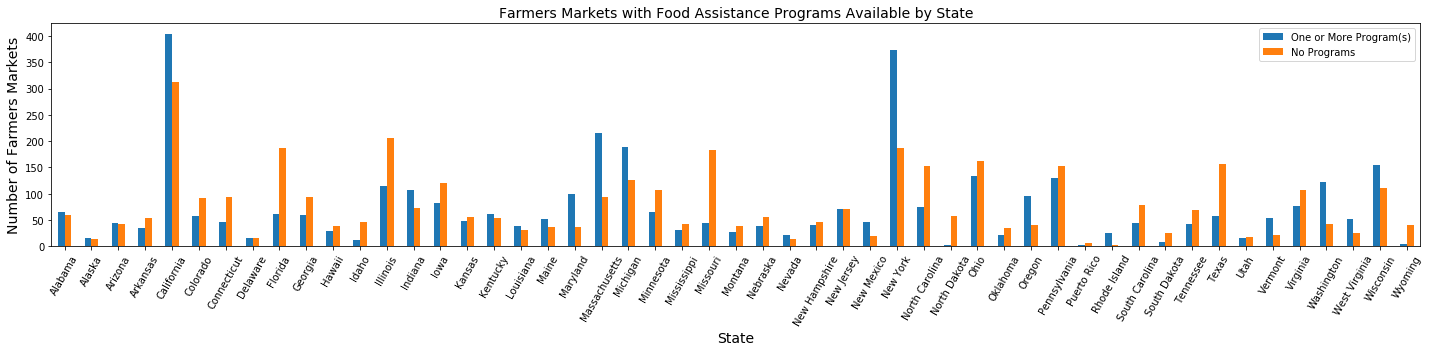

In [58]:
food_assistance_sort = food_assistance_count[["State","One or More Program(s)","No Programs"]]
food_assistance_plot = food_assistance_sort.plot(kind="bar", figsize=(20,5))
food_assistance_plot.set_xticklabels(food_assistance_sort["State"], rotation=60)
plt.title("Farmers Markets with Food Assistance Programs Available by State",size= 14)
plt.xlabel("State",size= 14)
plt.ylabel("Number of Farmers Markets",size= 14)
plt.tight_layout()
plt.savefig("./Priya's Resources/Farmers Markets with Food Assistance Programs.png")
plt.show()


In [59]:
no_assistance_count = food_assistance_count.loc[food_assistance_count["No Program %"] > 50,["State","Income Per Capita","Median Household Income","All Program %","FA Program %","No Program %"]]
no_assistance_count.head()

,State,Income Per Capita,Median Household Income,All Program %,FA Program %,No Program %
3,Arkansas,25940.38,49388.85,4.60,39.08,60.92
5,Colorado,31238.66,58125.42,0.00,38.67,61.33
6,Connecticut,37396.48,70203.87,7.80,33.33,66.67
8,Florida,28111.49,50407.63,0.80,24.80,75.20
9,Georgia,28175.46,54231.26,1.31,39.22,60.78


In [60]:
some_assistance_count = food_assistance_count.loc[food_assistance_count["FA Program %"] > 50,["State","Income Per Capita","Median Household Income","All Program %","FA Program %","No Program %"]]
some_assistance_count.head()

,State,Income Per Capita,Median Household Income,All Program %,FA Program %,No Program %
0,Alabama,28138.94,54869.86,3.20,52.00,48.00
1,Alaska,33145.07,71762.55,6.90,55.17,44.83
2,Arizona,25615.11,49382.46,28.74,51.72,48.28
4,California,30828.51,61978.26,12.83,56.35,43.65
13,Indiana,28187.84,56262.42,12.78,60.00,40.00


The correlation coefficient between the Income Per Capita and Median Household Income per state is 0.9389.


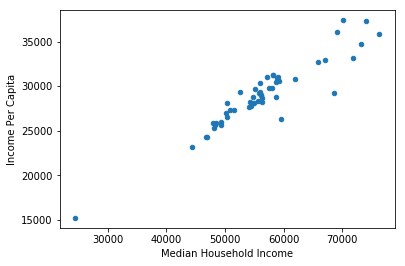

In [62]:
food_assistance_count.plot(kind = "scatter", x = "Median Household Income",y = "Income Per Capita")
correlation = st.pearsonr(food_assistance_count["Income Per Capita"],food_assistance_count["Median Household Income"])[0]
print(f"The correlation coefficient between the Income Per Capita and Median Household Income per state is {round(correlation,4)}.")

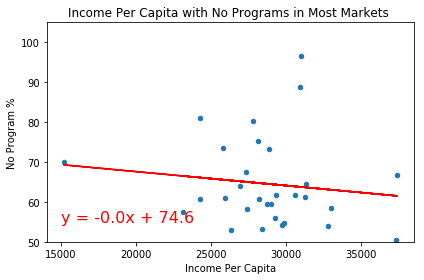

The correlation coefficient between the Income Per Capita in a state and states in which greater than 50% of farmers markets have no financial assistance programs is -0.1311.


In [63]:
no_assistance_count.plot(kind = "scatter", x = "Income Per Capita",y = "No Program %")
plt.title("Income Per Capita with No Programs in Most Markets ")
plt.ylim(50,105)
(slope, intercept, rvalue, pvalue, stderr) = linregress(no_assistance_count["Income Per Capita"],no_assistance_count["No Program %"])
regress_values = no_assistance_count["Income Per Capita"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(no_assistance_count["Income Per Capita"],regress_values,"r-")
plt.annotate(line_eq,(15000,55),fontsize=16,color="red")
plt.tight_layout()
plt.savefig("./Priya's Resources/Income Per Capita of Markets with No Programs.png")
plt.show()
correlation = st.pearsonr(no_assistance_count["Income Per Capita"],no_assistance_count["No Program %"])[0]
print(f"The correlation coefficient between the Income Per Capita in a state and states in which greater than 50% of farmers markets have no financial assistance programs is {round(correlation,4)}.")

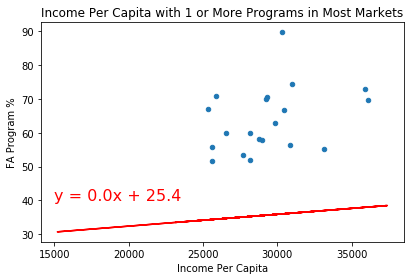

The correlation coefficient between the Income Per Capita in a state and states in which greater than 50% of farmers markets have at least one financial assistance program is 0.1311.


In [65]:
some_assistance_count.plot(kind = "scatter", x = "Income Per Capita",y = "FA Program %")
plt.title("Income Per Capita with 1 or More Programs in Most Markets")
# plt.ylim(50,105)
(slope, intercept, rvalue, pvalue, stderr) = linregress(no_assistance_count["Income Per Capita"],no_assistance_count["FA Program %"])
regress_values = no_assistance_count["Income Per Capita"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(no_assistance_count["Income Per Capita"],regress_values,"r-")
plt.annotate(line_eq,(15000,40),fontsize=16,color="red")
plt.tight_layout()
plt.savefig("./Priya's Resources/Income Per Capita of Markets with 1 or More Programs.png")
plt.show()
correlation = st.pearsonr(no_assistance_count["Income Per Capita"],no_assistance_count["FA Program %"])[0]
print(f"The correlation coefficient between the Income Per Capita in a state and states in which greater than 50% of farmers markets have at least one financial assistance program is {round(correlation,4)}.")

The correlation coefficient between the Income Per Capita and total farmers markets per state is 0.2353.


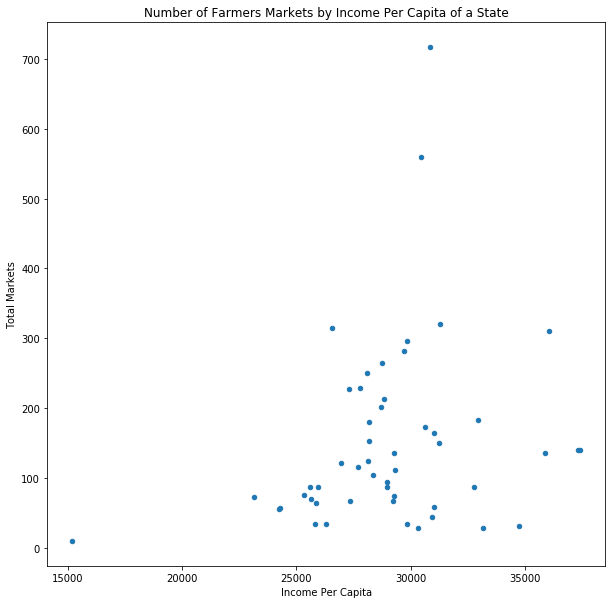

In [66]:
food_assistance_count.plot(kind = "scatter", x = "Income Per Capita",y = "Total Markets",figsize=(10,10))
plt.title("Number of Farmers Markets by Income Per Capita of a State")
plt.savefig("./Priya's Resources/Total Farmers Markets v Insome Per Capita.png")
correlation = st.pearsonr(food_assistance_count["Income Per Capita"],food_assistance_count["Total Markets"])[0]
print(f"The correlation coefficient between the Income Per Capita and total farmers markets per state is {round(correlation,4)}.")

37396.48
15210.7


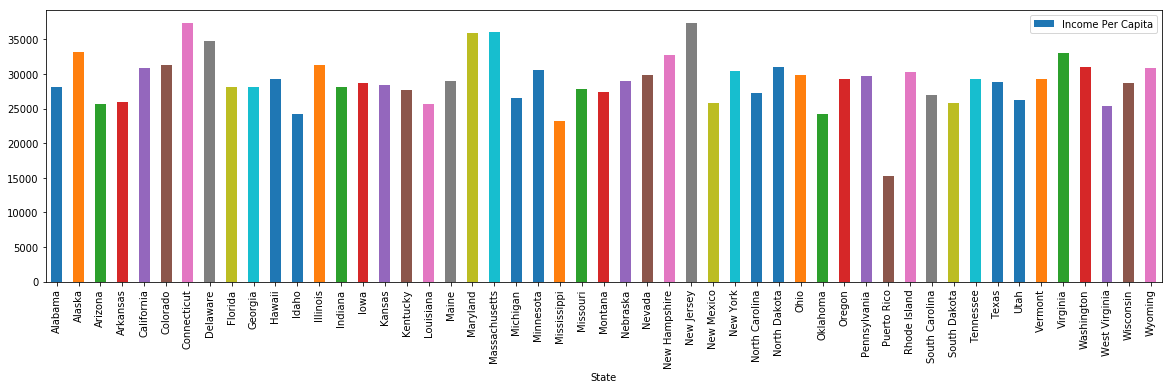

In [67]:
food_assistance_count.plot(kind = "bar", x = "State",y = "Income Per Capita",figsize=(20,5))
print(f"{food_assistance_count['Income Per Capita'].max()}")
print(f"{food_assistance_count['Income Per Capita'].min()}")

# Food Deserts Data Overview / Cleaning

In [68]:
desert_df.head()

,CensusTract,State,County,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,1001020100,Alabama,Autauga,1,1912,693,0,0,0.000000,0,...,221,1622,217,14,0,14,45,44,26,112
1,1001020200,Alabama,Autauga,1,2170,743,0,181,0.083410,0,...,214,888,1217,5,0,5,55,75,87,202
2,1001020300,Alabama,Autauga,1,3373,1256,0,0,0.000000,0,...,439,2576,647,17,5,11,117,87,108,120
3,1001020400,Alabama,Autauga,1,4386,1722,0,0,0.000000,0,...,904,4086,193,18,4,11,74,85,19,82
4,1001020500,Alabama,Autauga,1,10766,4082,0,181,0.016812,0,...,1126,8666,1437,296,9,48,310,355,198,488


In [69]:
desert_var.head()

,Field,LongName,Description
0,CensusTract,Census tract,Census tract number
1,State,State,State name
2,County,County,County name
3,Urban,Urban tract,Flag for urban tract
4,POP2010,"Population, tract total",Population count from 2010 census


In [33]:
food_desert_df = desert_df[["State","County","Urban","POP2010","PovertyRate","MedianFamilyIncome","TractSNAP"]]
poverty = round(food_desert_df[["State","PovertyRate","TractSNAP"]].groupby("State").mean(),2)
poverty = poverty.reset_index()

0.69

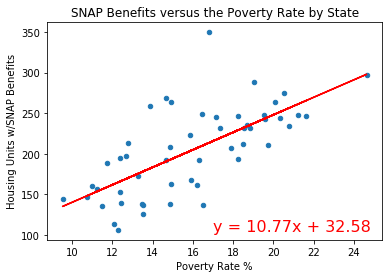

In [92]:
poverty.plot(kind = "scatter",x = "PovertyRate", y = "TractSNAP")
plt.xlabel("Poverty Rate %")
plt.ylabel("Housing Units w/SNAP Benefits")
plt.title("SNAP Benefits versus the Poverty Rate by State")
(slope, intercept, rvalue, pvalue, stderr) = linregress(poverty["PovertyRate"],poverty["TractSNAP"])
regress_values = poverty["PovertyRate"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(poverty["PovertyRate"],regress_values,"r-")
plt.annotate(line_eq,(17,105),fontsize=16,color="red")
plt.savefig("./Priya's Resources/SNAP Benefits versus the Poverty Rate by State.png")

correlation = st.pearsonr(poverty["PovertyRate"],poverty["TractSNAP"])[0]
round(correlation,2)

In [76]:
snap_support = cleaned_access.loc[(cleaned_access ["SNAP"] == "Y"),:]
snap_states = snap_support.groupby("State").count().reset_index()
snap_states = snap_states[["State","SNAP"]].rename(columns={"SNAP":"MarketSNAP"})
snap_states.head()

,State,MarketSNAP
0,Alabama,24
1,Alaska,7
2,Arizona,35
3,Arkansas,22
4,California,323


In [86]:
poverty_assistance_df = pd.merge(poverty,snap_states,how = "outer",on = "State")
poverty_assistance_df = poverty_assistance_df.dropna().sort_values("PovertyRate")

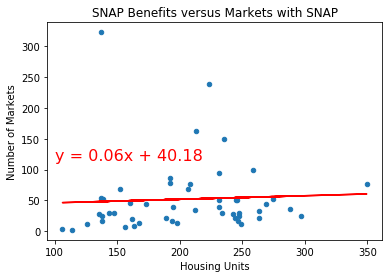

0.05

In [93]:
poverty_assistance_df.plot(kind = "scatter",x = "TractSNAP", y = "MarketSNAP")
plt.xlabel("Housing Units")
plt.ylabel("Number of Markets")
plt.title("SNAP Benefits versus Markets with SNAP")
(slope, intercept, rvalue, pvalue, stderr) = linregress(poverty_assistance_df["TractSNAP"],poverty_assistance_df["MarketSNAP"])
regress_values = poverty_assistance_df["TractSNAP"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(poverty_assistance_df["TractSNAP"],regress_values,"r-")
plt.annotate(line_eq,(100,115),fontsize=16,color="red")
plt.savefig("./Priya's Resources/SNAP Benefits versus Markets with SNAP.png")
plt.show()


correlation = st.pearsonr(poverty_assistance_df["TractSNAP"],poverty_assistance_df["MarketSNAP"])[0]
round(correlation,2)